In [551]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OrdinalEncoder
import dtale

In [552]:
Headers=['Over_Ball','Batting_Team','Striking_Batsman','Non_Striking_Batsman','Bowler','Runs_Scored','Extras','Fallen_Wickets','Stadium','Cumulative_Runs_Scored','Bowling_Team','Final_Score']
df=pd.read_csv('matches.csv',names=Headers)
df.head()

,Over_Ball,Batting_Team,Striking_Batsman,Non_Striking_Batsman,Bowler,Runs_Scored,Extras,Fallen_Wickets,Stadium,Cumulative_Runs_Scored,Bowling_Team,Final_Score
0,0.1,Peshawar Zalmi,Kamran Akmal,DJ Malan,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,0.0,Islamabad United,190.0
1,0.2,Peshawar Zalmi,Kamran Akmal,DJ Malan,Mohammad Irfan,1.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0
2,0.3,Peshawar Zalmi,DJ Malan,Kamran Akmal,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0
3,0.4,Peshawar Zalmi,DJ Malan,Kamran Akmal,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0
4,0.5,Peshawar Zalmi,DJ Malan,Kamran Akmal,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0


# Data Cleaning and Encoding

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14347 entries, 0 to 14346
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Over_Ball               14347 non-null  object 
 1   Batting_Team            14346 non-null  object 
 2   Striking_Batsman        14346 non-null  object 
 3   Non_Striking_Batsman    14346 non-null  object 
 4   Bowler                  14346 non-null  object 
 5   Runs_Scored             14346 non-null  float64
 6   Extras                  14346 non-null  float64
 7   Fallen_Wickets          14346 non-null  float64
 8   Stadium                 14346 non-null  object 
 9   Cumulative_Runs_Scored  14346 non-null  float64
 10  Bowling_Team            14346 non-null  object 
 11  Final_Score             14346 non-null  float64
dtypes: float64(5), object(7)
memory usage: 1.3+ MB


In [554]:
df.describe()

,Runs_Scored,Extras,Fallen_Wickets,Cumulative_Runs_Scored,Final_Score
count,14346.000000,14346.000000,14346.000000,14346.000000,14346.000000
mean,1.233375,0.063153,2.560853,75.299387,156.541057
std,1.619562,0.341891,2.148534,48.295520,29.749035
min,0.000000,0.000000,0.000000,0.000000,59.000000
25%,0.000000,0.000000,1.000000,35.000000,136.000000
50%,1.000000,0.000000,2.000000,72.000000,157.000000
75%,1.000000,0.000000,4.000000,110.000000,181.000000
max,6.000000,5.000000,10.000000,237.000000,237.000000


In [555]:
df.isna().sum()

Over_Ball                 0
Batting_Team              1
Striking_Batsman          1
Non_Striking_Batsman      1
Bowler                    1
Runs_Scored               1
Extras                    1
Fallen_Wickets            1
Stadium                   1
Cumulative_Runs_Scored    1
Bowling_Team              1
Final_Score               1
dtype: int64

In [556]:
df.dropna( subset=['Batting_Team','Striking_Batsman','Non_Striking_Batsman','Bowler','Runs_Scored','Extras','Fallen_Wickets','Stadium','Cumulative_Runs_Scored','Bowling_Team','Final_Score'],axis=0, inplace=True)

In [558]:
df.head()

,Over_Ball,Batting_Team,Striking_Batsman,Non_Striking_Batsman,Bowler,Runs_Scored,Extras,Fallen_Wickets,Stadium,Cumulative_Runs_Scored,Bowling_Team,Final_Score
0,0.1,Peshawar Zalmi,Kamran Akmal,DJ Malan,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,0.0,Islamabad United,190.0
1,0.2,Peshawar Zalmi,Kamran Akmal,DJ Malan,Mohammad Irfan,1.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0
2,0.3,Peshawar Zalmi,DJ Malan,Kamran Akmal,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0
3,0.4,Peshawar Zalmi,DJ Malan,Kamran Akmal,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0
4,0.5,Peshawar Zalmi,DJ Malan,Kamran Akmal,Mohammad Irfan,0.0,0.0,0.0,Dubai International Cricket Stadium,1.0,Islamabad United,190.0


In [559]:
df[['Runs_Scored','Extras','Fallen_Wickets','Cumulative_Runs_Scored','Final_Score']]=df[['Runs_Scored','Extras','Fallen_Wickets','Cumulative_Runs_Scored','Final_Score']].astype(int)

In [560]:
df.replace("Gaddafi Stadium", "Gaddafi Stadium Lahore", inplace = True)

# Exploratory Data Analysis

<AxesSubplot:>

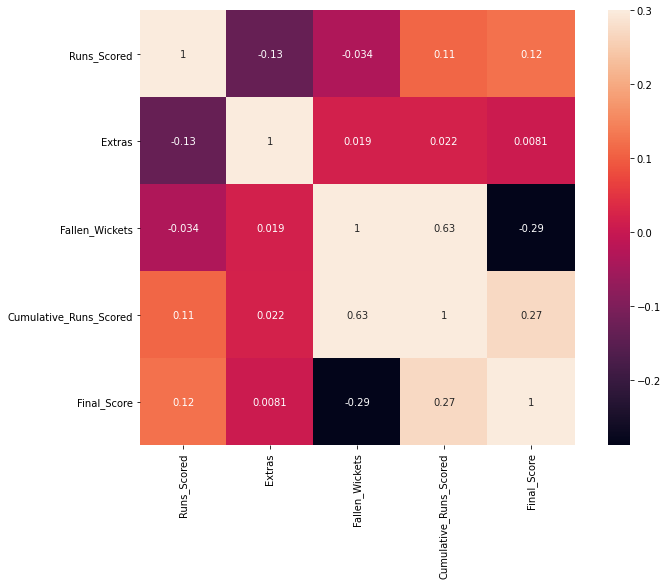

In [561]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=.3, square=True,annot=True)

In [562]:
dtale.show(df)

http://DESKTOP-25DJB97:40000/dtale/main/1
It looks like this data may have already been loaded to D-Tale based on shape and column names. Here is URL of the data that seems to match it:

None

If you still want to load this data please use the following command:

dtale.show(df, ignore_duplicate=True)


In [563]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['Batting_Team'],
	df['Final_Score'],
], axis=1)
chart_data = chart_data.sort_values(['Batting_Team'])
chart_data = chart_data.rename(columns={'Batting_Team': 'x'})
chart_data = chart_data.groupby(['x'])[['Final_Score']].mean().reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Final_Score']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Final_Score by Batting_Team (Mean)'},
    'xaxis': {'title': {'text': 'Batting_Team'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'Final_Score (Mean)'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)
figure.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [564]:
# if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
# 	df = df.to_frame(index=False)

# # remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
# df = df.reset_index().drop('index', axis=1, errors='ignore')
# df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

# chart_data = pd.concat([
# 	df['Fallen_Wickets'],
# 	df['Cumulative_Runs_Scored'],
# 	df['Batting_Team'],
# ], axis=1)
# chart_data = chart_data.query("""(Batting_Team == 'Islamabad United') or (Batting_Team == 'Karachi Kings') or (Batting_Team == 'Lahore Qalandars') or (Batting_Team == 'Multan Sultans') or (Batting_Team == 'Peshawar Zalmi') or (Batting_Team == 'Quetta Gladiators')""")
# chart_data = chart_data.sort_values(['Batting_Team', 'Fallen_Wickets'])
# chart_data = chart_data.rename(columns={'Fallen_Wickets': 'x'})
# chart_data = chart_data.groupby(['Batting_Team', 'x'])[['Cumulative_Runs_Scored']].mean().reset_index()
# chart_data = chart_data.dropna()
# # WARNING: This is not taking into account grouping of any kind, please apply filter associated with
# #          the group in question in order to replicate chart. For this we're using 'Batting_Team == 'Islamabad United''
# list=chart_data['Batting_Team'].value_counts().index.tolist()


# import plotly.graph_objs as go

# charts = []
# for team in list:

#     line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
#     team =go.Scatter(
# 	                  x=chart_data['x'], y=chart_data[chart_data['Batting_Team'] == team]['Cumulative_Runs_Scored'], 
#                       name='Cumulative_Runs_Scored_by_'+team, 
#                       **line_cfg
#                         )
#     charts.append(team)
# figure = go.Figure(data=charts, layout=go.Layout({
#     'legend': {'orientation': 'h'},
#     'title': {'text': 'Cumulative_Runs_Scored by Fallen_Wickets (Mean)'},
#     'xaxis': {'tickformat': '.0f', 'title': {'text': 'Fallen_Wickets'}},
#     'yaxis': {'tickformat': '.0f', 'title': {'text': 'Cumulative_Runs_Scored (Mean)'}}
# }))

# # If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

# from plotly.offline import iplot, init_notebook_mode

# init_notebook_mode(connected=True)
# figure.pop('id', None) # for some reason iplot does not like 'id'
# iplot(figure)

In [565]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['Fallen_Wickets'],
	df['Cumulative_Runs_Scored'],
	df['Batting_Team'],
], axis=1)
chart_data = chart_data.query("""(Batting_Team == 'Islamabad United') or (Batting_Team == 'Karachi Kings') or (Batting_Team == 'Lahore Qalandars') or (Batting_Team == 'Multan Sultans') or (Batting_Team == 'Peshawar Zalmi') or (Batting_Team == 'Quetta Gladiators')""")
chart_data = chart_data.sort_values(['Batting_Team', 'Fallen_Wickets'])
chart_data = chart_data.rename(columns={'Fallen_Wickets': 'x'})
chart_data = chart_data.groupby(['Batting_Team', 'x'])[['Cumulative_Runs_Scored']].mean().reset_index()
chart_data = chart_data.dropna()
# WARNING: This is not taking into account grouping of any kind, please apply filter associated with
#          the group in question in order to replicate chart. For this we're using 'Batting_Team == 'Islamabad United''
#chart_data = chart_data.query("""(Batting_Team == 'Islamabad United')""")

import plotly.graph_objs as go

#charts = []
#line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
#charts.append(go.Scatter(
#	x=chart_data['x'], y=chart_data['Cumulative_Runs_Scored'], name='Cumulative_Runs_Scored', **line_cfg
#))
isl = go.Scatter(
                x=chart_data['x'],
                y=chart_data[chart_data['Batting_Team'] == 'Islamabad United']['Cumulative_Runs_Scored'],
                name = "Cumulative Runs by Wickets for Islamabad",
                line = dict(color = '#17BECF'),
                opacity = 0.8)
kar = go.Scatter(
                x=chart_data['x'],
                y=chart_data[chart_data['Batting_Team'] == 'Karachi Kings']['Cumulative_Runs_Scored'],
                name = "Cumulative Runs by Wickets for Karachi",
                line = dict(color = '#888'),
                opacity = 0.8)
pes = go.Scatter(
                x=chart_data['x'],
                y=chart_data[chart_data['Batting_Team'] == 'Peshawar Zalmi']['Cumulative_Runs_Scored'],
                name = "Cumulative Runs by Wickets for Peshawar",
                line = dict(color = '#ffe476'),
                opacity = 0.8)
que = go.Scatter(
                x=chart_data['x'],
                y=chart_data[chart_data['Batting_Team'] == 'Quetta Gladiators']['Cumulative_Runs_Scored'],
                name = "Cumulative Runs by Wickets for Quetta",
                line = dict(color = '#0000ff'),
                opacity = 0.8)
lah = go.Scatter(
                x=chart_data['x'],
                y=chart_data[chart_data['Batting_Team'] == 'Lahore Qalandars']['Cumulative_Runs_Scored'],
                name = "Cumulative Runs by Wickets for Lahore",
                line = dict(color ='firebrick' ),
                opacity = 0.8)
mul = go.Scatter(
                x=chart_data['x'],
                y=chart_data[chart_data['Batting_Team'] == 'Multan Sultans']['Cumulative_Runs_Scored'],
                name = "Cumulative Runs by Wickets for Multan",
                line = dict(color = '#1f77b4'),
                opacity = 0.8)
charts=[isl,kar,pes,que,lah,mul]
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Cumulative_Runs_Scored by Fallen_Wickets (Mean)'},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'Fallen_Wickets'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'Cumulative_Runs_Scored (Mean)'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)
figure.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)


In [566]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['Stadium'],
	df['Final_Score'],
], axis=1)
chart_data = chart_data.sort_values(['Stadium'])
chart_data = chart_data.rename(columns={'Stadium': 'x'})
chart_data = chart_data.groupby(['x'])[['Final_Score']].mean().reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Final_Score']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Final_Score by Stadium (Mean)'},
    'xaxis': {'title': {'text': 'Stadium'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'Final_Score (Mean)'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

# from plotly.offline import iplot, init_notebook_mode

# init_notebook_mode(connected=True)
# chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(chart)
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['Stadium'],
	df['Final_Score'],
], axis=1)
chart_data = chart_data.sort_values(['Stadium'])
chart_data = chart_data.rename(columns={'Stadium': 'x'})
chart_data = chart_data.groupby(['x'])[['Final_Score']].mean().reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['Final_Score']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Final_Score by Stadium (Mean)'},
    'xaxis': {'title': {'text': 'Stadium'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'Final_Score (Mean)'}}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)
figure.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)


In [567]:
# features = ['Batting_Team','Bowling_Team']


# for f in features: 
#     df1 = df[[f]]

#     df2 = (pd.get_dummies(df1, prefix='', prefix_sep='')
#                    .max(level=0, axis=1)
#                    .add_prefix(f+' _ '))  


#     # add the new one-hot encoded column to the dataframe
#     df = pd.concat([df,df2], axis=1)

#     # you can remove the original columns, if you don't need them anymore (optional)
#     df.drop([f], axis=1,inplace=True) 



In [568]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import dill as pickle

In [569]:
#columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(), ['Stadium','Batting_Team','Bowling_Team'])], remainder='passthrough')

In [519]:
#list=['Striking_Batsman','Non_Striking_Batsman','Bowler','Stadium','Batting_Team','Bowling_Team']
#le = preprocessing.LabelEncoder()
#for feat in list:
    #df[feat] = le.fit_transform(df[feat])


In [570]:
#Shuffling the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace=True, drop=True)

In [571]:
Test=df.iloc[10000:,:]

In [572]:
TestX=Test[['Over_Ball','Batting_Team', 'Bowling_Team','Stadium','Runs_Scored', 'Extras', 'Fallen_Wickets','Cumulative_Runs_Scored']]
TestY=Test[['Final_Score']]

In [574]:
df.head()

,Over_Ball,Batting_Team,Striking_Batsman,Non_Striking_Batsman,Bowler,Runs_Scored,Extras,Fallen_Wickets,Stadium,Cumulative_Runs_Scored,Bowling_Team,Final_Score
0,18.1,Karachi Kings,Shahid Afridi,CA Ingram,Mohammad Sami,1,0,4,Dubai International Cricket Stadium,134,Islamabad United,154
1,15.2,Peshawar Zalmi,DJG Sammy,LA Dawson,Shadab Khan,0,0,5,National Stadium Karachi,111,Islamabad United,148
2,5.3,Peshawar Zalmi,LS Livingstone,Haider Ali,Mohammad Ilyas,0,0,4,Multan Cricket Stadium,41,Multan Sultans,123
3,12.2,Peshawar Zalmi,EJG Morgan,Kamran Akmal,Saeed Ajmal,0,0,1,Dubai International Cricket Stadium,126,Islamabad United,190
4,12.3,Islamabad United,Asif Ali,Shadab Khan,Shahid Afridi,1,0,5,Sharjah Cricket Stadium,85,Karachi Kings,124


In [575]:
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = preprocessing.LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = preprocessing.LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [576]:
ml=MultiColumnLabelEncoder()
df[['Batting_Team','Bowling_Team','Stadium']]=ml.fit_transform(df[['Batting_Team','Bowling_Team','Stadium']])


# Model Development and Evaluation

In [577]:
with open('important', 'wb') as file1:
     pickle.dump(ml, file1)

In [581]:
df.head()

,Over_Ball,Batting_Team,Striking_Batsman,Non_Striking_Batsman,Bowler,Runs_Scored,Extras,Fallen_Wickets,Stadium,Cumulative_Runs_Scored,Bowling_Team,Final_Score
0,18.1,1,Shahid Afridi,CA Ingram,Mohammad Sami,1,0,4,0,134,0,154
1,15.2,4,DJG Sammy,LA Dawson,Shadab Khan,0,0,5,3,111,0,148
2,5.3,4,LS Livingstone,Haider Ali,Mohammad Ilyas,0,0,4,2,41,3,123
3,12.2,4,EJG Morgan,Kamran Akmal,Saeed Ajmal,0,0,1,0,126,0,190
4,12.3,0,Asif Ali,Shadab Khan,Shahid Afridi,1,0,5,5,85,1,124


<AxesSubplot:>

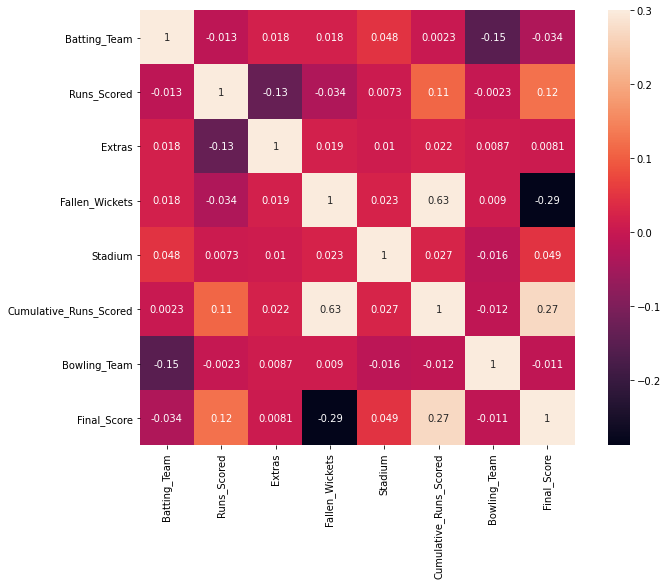

In [582]:
cor=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,vmax=.3, square=True,annot=True)

In [583]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from xgboost import plot_tree
from numpy import mean
from numpy import std
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [584]:
df.columns

Index(['Over_Ball', 'Batting_Team', 'Striking_Batsman', 'Non_Striking_Batsman',
       'Bowler', 'Runs_Scored', 'Extras', 'Fallen_Wickets', 'Stadium',
       'Cumulative_Runs_Scored', 'Bowling_Team', 'Final_Score'],
      dtype='object')

### Data Normalization

In [585]:
#scaler=preprocessing.MinMaxScaler()
#X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
#X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X=df[['Over_Ball','Batting_Team', 'Bowling_Team','Stadium','Runs_Scored', 'Extras', 'Fallen_Wickets','Cumulative_Runs_Scored']]
Y=df['Final_Score']
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)



In [586]:
#with open('sc', 'wb') as file2:
     #pickle.dump(sc, file2)

### Train Test Split

In [587]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=1,test_size=0.20)

## Random Forest Regressor

In [588]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=100,max_features=None)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_features=None)

In [589]:
with open('model', 'wb') as file3:
     pickle.dump(rfr, file3)

In [590]:
pred=rfr.predict(X_test)

In [591]:
rfr.score(X_test,y_test)

0.9555622187839844

In [592]:
r2 = r2_score(y_test, rfr.predict(X_test))
print("The R2  on test set: {:.4f}".format(r2))

The R2  on test set: 0.9556


In [593]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 2.9048023892483825
Mean Squared Error (MSE): 39.81491252940024
Root Mean Squared Error (RMSE): 6.30990590495613
